In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [2]:
fashion_mnist_df = pd.read_csv('fashion-mnist_train.csv')

In [3]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Notic, we have 60,000 picture, with 784 pixel information, 1 column for the label, total = 785 columns
fashion_mnist_df.shape

(60000, 785)

In [5]:
# we will use a fraction sample from the dataset because it would take too long time on local machine
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

fashion_mnist_df.shape

(18000, 785)

In [6]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,2,8,4,2,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,1,7,0,0,147,71,21,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#make a dict which maps the "label number" to actual fashion accessory

LOOKUP = {0: 'T-shirt', 
          1: 'Trouser', 
          2: 'Pullover', 
          3: 'Dress', 
          4: 'Coat',
          5: 'Sandal', 
          6: 'Shirt', 
          7: 'Sneaker', 
          8: 'Bag', 
          9: 'Ankle boot'}

In [8]:
#define a function to display images, it takes the feature-numbers- and label number and it display it using matplotlib
#notic we need reshape the images because in 1-d array, we transform it into 28×28 matrix
def display_image(features, actual_label):
    print("Actual label: ", LOOKUP[actual_label])
    
    plt.imshow(features.reshape(28,28))

In [9]:
X = fashion_mnist_df[fashion_mnist_df.columns[1:]]

Y = fashion_mnist_df['label']

In [10]:
Y.head()

0    4
1    7
2    4
3    2
4    5
Name: label, dtype: int64

In [11]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,3,2,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,2,8,4,2,0,0,0,0
3,0,0,0,0,0,0,0,0,0,22,...,1,7,0,0,147,71,21,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Actual label:  Trouser


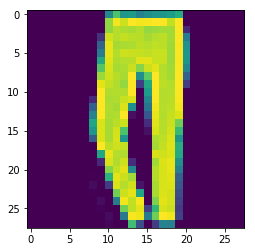

In [12]:
display_image(X.loc[5].values, Y.loc[5])

Actual label:  Coat


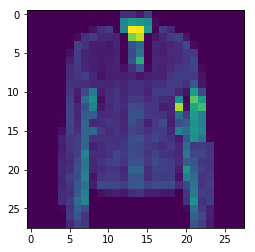

In [13]:
display_image(X.loc[15088].values, Y.loc[15088])

Actual label:  Sandal


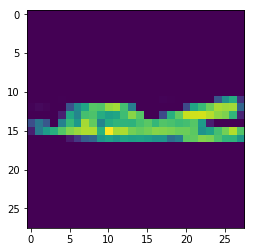

In [14]:
display_image(X.loc[567].values, Y.loc[567])

In [15]:
#rescale the value to range from 0-1, notice, all numbers of features range from 0-255 so dividing by 255
X = X/255.

X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.011765,0.007843,0.0,0.000000,...,0.003922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.007843,0.031373,0.015686,0.007843,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.086275,...,0.003922,0.027451,0.000000,0.000000,0.576471,0.278431,0.082353,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [17]:
x_train.shape, y_train.shape

((14400, 784), (14400,))

In [18]:
x_test.shape, y_test.shape

((3600, 784), (3600,))

In [19]:
#average='weighted' because here we have multi-class classification. if avarage='none' you will get precision and recall for each category seperately

def summarize_classification(y_test, 
                             y_pred, 
                             avg_method='weighted'):
    
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)

    prec = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    
    print("Test data count: ",len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("precision_score : " , prec)
    print("recall_score : ", recall)

In [20]:
# instead of solver="liblinear" we use solver='sag' this is optimizer for multinomial loss for multi-class classification, it converges fast on large dataset
#"Liblinear" will use one-vs-rest scheme, i.e. it will choose a class as a baseline vs rest.
#"liblinear" is suitable for small dataset
# multi_class='auto' you let logistic-regression to decide if we're doing binary classification or multi-class classification
logistic_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [21]:
y_pred = logistic_model.predict(x_test)

y_pred

array([6, 6, 0, ..., 2, 2, 9], dtype=int64)

In [22]:
summarize_classification(y_test, y_pred)

Test data count:  3600
accuracy_count :  3022
accuracy_score :  0.8394444444444444
precision_score :  0.8384991015576636
recall_score :  0.8394444444444444
